<a href="https://colab.research.google.com/github/PLEX-GR00T/Pose_Estimation/blob/main/Workout_Pose_2D_17Keypoints_Classification_with_TF(Toy2_Front).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [45]:
# Upload first your data before execute these code below
path_workout = "/content/drive/MyDrive/295A/toy_robot_2.csv"; # change this
path_other = "/content/drive/MyDrive/295A/Negative_sample_hurt.csv"; # change this
name_class = "squat" # change this
# change resolution if you using video with different resolution
resolution = { 
    "width": 640,
    "height": 360
}

In [46]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [47]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,912.000504,230.277271,922.646542,221.426640,895.346088,222.160606,943.620358,231.055527,873.998051,234.400005,...,873.108788,543.068161,984.826698,732.036209,845.884495,724.746552,1004.239197,904.055901,789.888382,894.045067
1,896.127331,234.272222,916.691769,217.483124,884.729132,216.866221,937.297325,233.612529,866.934839,234.387562,...,870.984995,544.976930,992.235182,740.345123,833.231954,736.288134,1003.812204,888.388320,787.796980,886.229842
2,902.882471,232.666797,916.078132,219.176945,886.346433,219.307011,937.400509,229.996401,868.128464,236.154546,...,869.749759,541.448348,993.816437,737.972215,832.795812,735.206644,1003.643576,890.186643,789.554796,886.406227
3,903.468818,236.185464,915.532693,219.344799,883.546026,220.344549,936.607326,232.968703,866.502768,238.883162,...,869.862252,538.481513,994.034624,736.793910,833.517306,732.510041,1005.436019,888.009300,786.442992,882.435163
4,903.183087,234.475765,915.529153,220.028276,884.884957,219.316382,936.682634,232.247556,867.626820,237.144734,...,870.046392,538.097884,993.123780,736.495112,834.041590,732.210471,1005.834369,888.632082,787.438545,880.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,835.630411,211.118937,852.324377,199.833458,821.118006,196.888691,868.538390,217.746659,800.399271,213.168416,...,793.210345,511.694583,931.506541,698.218772,800.179038,718.006676,985.523506,870.073025,802.374297,876.075868
1660,835.630367,211.126578,852.319744,199.842674,821.109468,196.911268,868.524402,217.753686,800.399594,213.180968,...,793.205528,511.615667,931.485649,698.206654,800.165844,718.021069,985.506921,870.070360,802.428942,875.987069
1661,835.609197,211.167104,852.288949,199.889750,821.110316,196.951943,868.536786,217.807449,800.606660,213.991708,...,793.195090,511.731971,931.427367,697.994252,800.202033,718.030134,985.534260,870.126551,802.434853,876.094442
1662,835.620934,211.121647,852.339719,199.815831,821.109357,196.849547,868.462117,217.654073,800.417177,213.089653,...,793.246853,511.759614,931.497830,698.189134,800.170614,718.004215,985.511121,870.045982,802.382344,876.024319


In [48]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,636.673774,348.974856,673.028442,317.453664,604.587235,327.114977,714.647095,274.159921,583.821847,358.503887,...,532.308365,362.480015,664.858807,478.644387,400.442980,534.055366,621.462922,400.570273,479.759662,388.731904
1,539.170219,133.527924,590.298684,126.898459,521.627566,127.372654,595.477389,118.991039,587.485304,119.073619,...,612.211568,349.739290,670.302759,429.194155,625.680424,419.949389,677.457461,514.712232,643.503413,507.057337
2,540.986414,160.699131,543.026697,134.396182,524.633908,137.391353,566.646503,128.853482,499.165411,139.402797,...,659.413646,362.396448,758.304158,406.468687,645.753320,412.301908,773.584656,444.441814,664.781204,448.429506
3,598.940630,144.736770,614.813331,120.031045,572.834098,121.702599,616.283230,120.257611,547.743587,115.148239,...,611.818734,328.684319,847.411754,525.450005,633.141350,422.066410,731.052325,503.522052,630.339070,490.619591
4,599.734116,-20.349724,655.936813,-70.143291,574.252663,-66.363632,709.233856,-56.775658,518.532295,-43.063938,...,535.062218,586.962708,683.630753,578.841904,477.241707,595.336884,697.047806,709.615524,656.528473,675.037888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,581.849299,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564
1411,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,580.170049,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095
1412,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,581.793372,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000
1413,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,571.810288,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [49]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,912.000504,230.277271,922.646542,221.426640,895.346088,222.160606,943.620358,231.055527,873.998051,234.400005,...,543.068161,984.826698,732.036209,845.884495,724.746552,1004.239197,904.055901,789.888382,894.045067,squat
1,896.127331,234.272222,916.691769,217.483124,884.729132,216.866221,937.297325,233.612529,866.934839,234.387562,...,544.976930,992.235182,740.345123,833.231954,736.288134,1003.812204,888.388320,787.796980,886.229842,squat
2,902.882471,232.666797,916.078132,219.176945,886.346433,219.307011,937.400509,229.996401,868.128464,236.154546,...,541.448348,993.816437,737.972215,832.795812,735.206644,1003.643576,890.186643,789.554796,886.406227,squat
3,903.468818,236.185464,915.532693,219.344799,883.546026,220.344549,936.607326,232.968703,866.502768,238.883162,...,538.481513,994.034624,736.793910,833.517306,732.510041,1005.436019,888.009300,786.442992,882.435163,squat
4,903.183087,234.475765,915.529153,220.028276,884.884957,219.316382,936.682634,232.247556,867.626820,237.144734,...,538.097884,993.123780,736.495112,834.041590,732.210471,1005.834369,888.632082,787.438545,880.626118,squat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,835.630411,211.118937,852.324377,199.833458,821.118006,196.888691,868.538390,217.746659,800.399271,213.168416,...,511.694583,931.506541,698.218772,800.179038,718.006676,985.523506,870.073025,802.374297,876.075868,squat
1660,835.630367,211.126578,852.319744,199.842674,821.109468,196.911268,868.524402,217.753686,800.399594,213.180968,...,511.615667,931.485649,698.206654,800.165844,718.021069,985.506921,870.070360,802.428942,875.987069,squat
1661,835.609197,211.167104,852.288949,199.889750,821.110316,196.951943,868.536786,217.807449,800.606660,213.991708,...,511.731971,931.427367,697.994252,800.202033,718.030134,985.534260,870.126551,802.434853,876.094442,squat
1662,835.620934,211.121647,852.339719,199.815831,821.109357,196.849547,868.462117,217.654073,800.417177,213.089653,...,511.759614,931.497830,698.189134,800.170614,718.004215,985.511121,870.045982,802.382344,876.024319,squat


In [50]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,636.673774,348.974856,673.028442,317.453664,604.587235,327.114977,714.647095,274.159921,583.821847,358.503887,...,362.480015,664.858807,478.644387,400.442980,534.055366,621.462922,400.570273,479.759662,388.731904,other
1,539.170219,133.527924,590.298684,126.898459,521.627566,127.372654,595.477389,118.991039,587.485304,119.073619,...,349.739290,670.302759,429.194155,625.680424,419.949389,677.457461,514.712232,643.503413,507.057337,other
2,540.986414,160.699131,543.026697,134.396182,524.633908,137.391353,566.646503,128.853482,499.165411,139.402797,...,362.396448,758.304158,406.468687,645.753320,412.301908,773.584656,444.441814,664.781204,448.429506,other
3,598.940630,144.736770,614.813331,120.031045,572.834098,121.702599,616.283230,120.257611,547.743587,115.148239,...,328.684319,847.411754,525.450005,633.141350,422.066410,731.052325,503.522052,630.339070,490.619591,other
4,599.734116,-20.349724,655.936813,-70.143291,574.252663,-66.363632,709.233856,-56.775658,518.532295,-43.063938,...,586.962708,683.630753,578.841904,477.241707,595.336884,697.047806,709.615524,656.528473,675.037888,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564,other
1411,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095,other
1412,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000,other
1413,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587,other


In [51]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,912.000504,230.277271,922.646542,221.426640,895.346088,222.160606,943.620358,231.055527,873.998051,234.400005,...,543.068161,984.826698,732.036209,845.884495,724.746552,1004.239197,904.055901,789.888382,894.045067,squat
1,896.127331,234.272222,916.691769,217.483124,884.729132,216.866221,937.297325,233.612529,866.934839,234.387562,...,544.976930,992.235182,740.345123,833.231954,736.288134,1003.812204,888.388320,787.796980,886.229842,squat
2,902.882471,232.666797,916.078132,219.176945,886.346433,219.307011,937.400509,229.996401,868.128464,236.154546,...,541.448348,993.816437,737.972215,832.795812,735.206644,1003.643576,890.186643,789.554796,886.406227,squat
3,903.468818,236.185464,915.532693,219.344799,883.546026,220.344549,936.607326,232.968703,866.502768,238.883162,...,538.481513,994.034624,736.793910,833.517306,732.510041,1005.436019,888.009300,786.442992,882.435163,squat
4,903.183087,234.475765,915.529153,220.028276,884.884957,219.316382,936.682634,232.247556,867.626820,237.144734,...,538.097884,993.123780,736.495112,834.041590,732.210471,1005.834369,888.632082,787.438545,880.626118,squat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564,other
3075,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095,other
3076,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000,other
3077,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587,other


In [52]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [53]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,912.000504,230.277271,922.646542,221.426640,895.346088,222.160606,943.620358,231.055527,873.998051,234.400005,...,873.108788,543.068161,984.826698,732.036209,845.884495,724.746552,1004.239197,904.055901,789.888382,894.045067
1,896.127331,234.272222,916.691769,217.483124,884.729132,216.866221,937.297325,233.612529,866.934839,234.387562,...,870.984995,544.976930,992.235182,740.345123,833.231954,736.288134,1003.812204,888.388320,787.796980,886.229842
2,902.882471,232.666797,916.078132,219.176945,886.346433,219.307011,937.400509,229.996401,868.128464,236.154546,...,869.749759,541.448348,993.816437,737.972215,832.795812,735.206644,1003.643576,890.186643,789.554796,886.406227
3,903.468818,236.185464,915.532693,219.344799,883.546026,220.344549,936.607326,232.968703,866.502768,238.883162,...,869.862252,538.481513,994.034624,736.793910,833.517306,732.510041,1005.436019,888.009300,786.442992,882.435163
4,903.183087,234.475765,915.529153,220.028276,884.884957,219.316382,936.682634,232.247556,867.626820,237.144734,...,870.046392,538.097884,993.123780,736.495112,834.041590,732.210471,1005.834369,888.632082,787.438545,880.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,326.791679,390.098668,294.610462,412.936701,299.517515,424.240013,301.842017,409.373321,314.130487,427.591723,...,581.849299,393.481486,686.665679,214.844051,736.685472,381.752412,785.455623,113.609238,650.661450,482.816564
3075,305.979720,382.567050,289.372269,380.744482,284.525179,386.943834,282.267203,379.481738,292.754858,423.329395,...,580.170049,379.673520,683.609020,212.834284,750.809496,387.762337,789.044958,112.086793,647.652013,484.904095
3076,313.804970,420.671751,295.532438,415.714283,306.088737,433.554356,303.891726,403.622081,329.482910,440.865608,...,581.793372,406.148700,689.247276,225.626781,731.573248,405.102454,790.221417,106.402601,883.222513,395.823000
3077,314.743653,411.276570,300.178069,406.906961,309.339776,421.824586,307.371321,391.572126,324.249269,426.044078,...,571.810288,395.877416,685.258322,207.737663,736.751017,391.838301,796.037807,106.316522,876.274002,396.388587


In [54]:
y

0       squat
1       squat
2       squat
3       squat
4       squat
        ...  
3074    other
3075    other
3076    other
3077    other
3078    other
Name: class, Length: 3079, dtype: object

In [55]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [56]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [57]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1.425001,0.639659,1.441635,0.615074,1.398978,0.617113,1.474407,0.641821,1.365622,0.651111,...,1.364232,1.508523,1.538792,2.033434,1.321695,2.013185,1.569124,2.511266,1.234201,2.483459
1,1.400199,0.650756,1.432331,0.604120,1.382389,0.602406,1.464527,0.648924,1.354586,0.651077,...,1.360914,1.513825,1.550367,2.056514,1.301925,2.045245,1.568457,2.467745,1.230933,2.461750
2,1.410754,0.646297,1.431372,0.608825,1.384916,0.609186,1.464688,0.638879,1.356451,0.655985,...,1.358984,1.504023,1.552838,2.049923,1.301243,2.042241,1.568193,2.472741,1.233679,2.462240
3,1.411670,0.656071,1.430520,0.609291,1.380541,0.612068,1.463449,0.647135,1.353911,0.663564,...,1.359160,1.495782,1.553179,2.046650,1.302371,2.034750,1.570994,2.466692,1.228817,2.451209
4,1.411224,0.651322,1.430514,0.611190,1.382633,0.609212,1.463567,0.645132,1.355667,0.658735,...,1.359447,1.494716,1.551756,2.045820,1.303190,2.033918,1.571616,2.468422,1.230373,2.446184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,0.510612,1.083607,0.460329,1.147046,0.467996,1.178444,0.471628,1.137148,0.490829,1.187755,...,0.909140,1.093004,1.072915,0.596789,1.151071,1.060423,1.227274,0.315581,1.016659,1.341157
3075,0.478093,1.062686,0.452144,1.057624,0.444571,1.074844,0.441043,1.054116,0.457429,1.175915,...,0.906516,1.054649,1.068139,0.591206,1.173140,1.077118,1.232883,0.311352,1.011956,1.346956
3076,0.490320,1.168533,0.461769,1.154762,0.478264,1.204318,0.474831,1.121172,0.514817,1.224627,...,0.909052,1.128191,1.076949,0.626741,1.143083,1.125285,1.234721,0.295563,1.380035,1.099508
3077,0.491787,1.142435,0.469028,1.130297,0.483343,1.171735,0.480268,1.087700,0.506639,1.183456,...,0.893454,1.099659,1.070716,0.577049,1.151173,1.088440,1.243809,0.295324,1.369178,1.101079


### One Hot Encoding

In [58]:
y = pd.get_dummies(y).values
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

### Split Dataset

In [59]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [60]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 2771
The number of test data X is: 308
The number of train data y is : 2771
The number of test daya y is : 308
The total dataset is : 3079


## Modelling

In [61]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                2240      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [63]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [64]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [65]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
44/44 [==============================] - 2s 9ms/step - loss: 0.7760 - accuracy: 0.5088 - val_loss: 0.6731 - val_accuracy: 0.5584
Epoch 2/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6860 - accuracy: 0.5348 - val_loss: 0.6654 - val_accuracy: 0.6039
Epoch 3/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.5756 - val_loss: 0.6221 - val_accuracy: 0.7500
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6164 - accuracy: 0.6499 - val_loss: 0.5275 - val_accuracy: 0.8247
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 0.5419 - accuracy: 0.7481 - val_loss: 0.3694 - val_accuracy: 0.8831
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.4356 - accuracy: 0.8250 - val_loss: 0.2518 - val_accuracy: 0.9188
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - loss: 0.3572 - accuracy: 0.8600 - val_loss: 0.1947 - val_accuracy: 0.9318
Epoch 8/200
4

## Visualization Acc & Loss

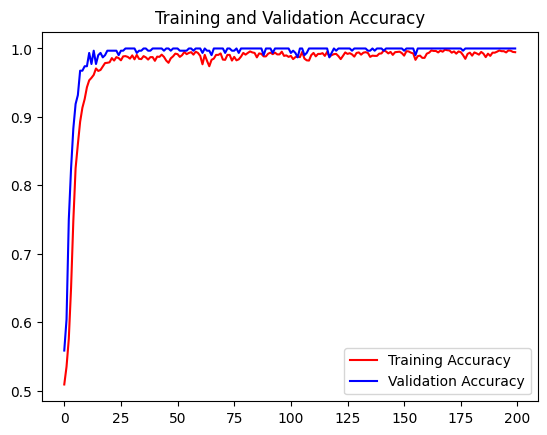

<Figure size 640x480 with 0 Axes>

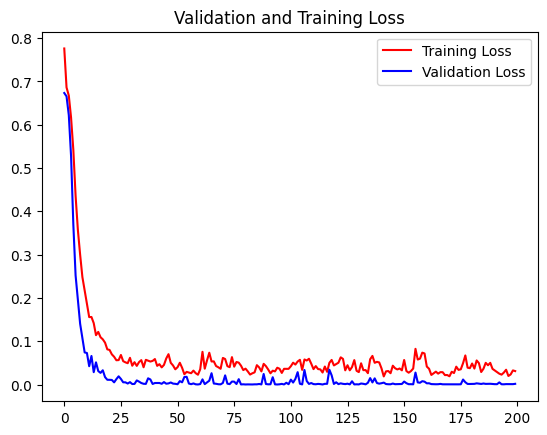

<Figure size 640x480 with 0 Axes>

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [67]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.0015929873334243894
Test accuracy: 1.0


## Test Prediction

In [68]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
541,1.305645,0.586414,1.331762,0.554897,1.282958,0.546748,1.357014,0.604357,1.250771,0.592287,...,1.239407,1.421295,1.455399,1.939315,1.250272,1.994289,1.539954,2.416607,1.253718,2.433456


In [69]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : squat


In [70]:
df_data['class'].unique()

array(['squat', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [71]:
predict_sample = model.predict(x_sample)

1/1 [==============================] - 0s 56ms/step


In [72]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
squat


## Export Model

In [73]:
# Download this file for backup
model.save("model.h5")

In [74]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2023-04-06 16:25:45.778485: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-06 16:25:45.778620: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-06 16:25:45.778662: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [76]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

updating: content/tfjs_float_model_workout/ (stored 0%)
updating: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 7%)
updating: content/tfjs_float_model_workout/model.json (deflated 78%)


Don't forget to download tfjs model (check relatable folder)